In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import combinations

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Pre-processing the data


### loading data and checking missing data

In [330]:
data = pd.read_csv('./bank_v2.csv')

In [331]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no


In [332]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### transforming the non-numerical data to numerical data

In [333]:
class_le = LabelEncoder()
data.iloc[:,[1,2,3,4,6,7,8,10,15,16]]=data.iloc[:,[1,2,3,4,6,7,8,10,15,16]].apply(class_le.fit_transform)
col = data.columns[:-1]

In [334]:
data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0


### spliting and standardizing data

In [335]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [336]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3164, 16), (3164,), (1357, 16), (1357,))

# Training the data and predicting the outcome

In [467]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=cmap(idx),
                    marker=markers[idx], 
                    label=cl, 
                    )
    
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=55, 
                    label='test set')

In [494]:
#the parameter method should be in ['LogisticRegression','SVC','DecisionTreeClassifier']
def ml_predict(feat, method = LogisticRegression, plot = True):
    x_train_std = X_train_std[:,feat]
    x_test_std = X_test_std[:,feat]
    
    assert(method.__name__ in ['LogisticRegression','SVC','DecisionTreeClassifier'])
    
    if method.__name__ == 'LogisticRegression':
        cl = LogisticRegression(C=1000.0, random_state=0)
        cl.fit(x_train_std, y_train)
        
    elif method.__name__ == 'SVC':
        cl = SVC(kernel='rbf', C=1.0, random_state=0)
        cl.fit(x_train_std, y_train)
    
    elif method.__name__ == 'DecisionTreeClassifier':
        cl = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
        cl.fit(x_train_std, y_train)
        
    else: raise ValueError

    y_pred = cl.predict(x_test_std)
    score = accuracy_score(y_test,y_pred)
    
    if plot == True:
        x_combined_std = np.vstack((x_train_std, x_test_std))
        y_combined = np.hstack((y_train, y_test))
        plot_decision_regions(x_combined_std, y_combined, classifier = cl, test_idx=range(3164,4520))
        plt.xlabel(col[feat[0]])
        plt.ylabel(col[feat[1]])
        plt.legend(loc = 'upper left')
        plt.title(method.__name__)
        plt.show()
        
    else: pass
    
    return score

In [495]:
feat = np.random.randint(1,X_test.shape[1],2)

In [496]:
feat = np.array([5,11])

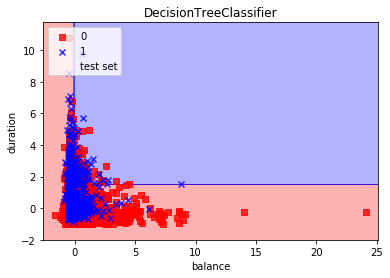

0.866617538688283

In [497]:
ml_predict(feat, method = DecisionTreeClassifier, plot = True)

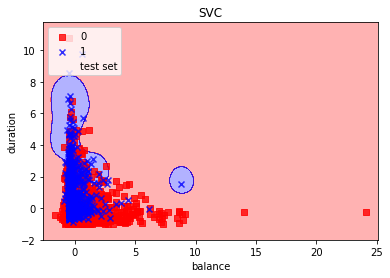

0.8732498157700811

In [498]:
ml_predict(feat, method = SVC, plot = True)

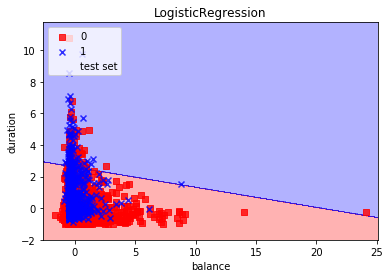

0.8739867354458364

In [516]:
ml_predict(feat, method = LogisticRegression, plot = True)

# finding the best two features and show the graph

In [507]:
svc_score = {}
tree_score = {}
lr_score = {}
for i in combinations(range(1,X_test.shape[1]), 2):
    tree_score[i] = ml_predict(i, method = DecisionTreeClassifier, plot = False)
    svc_score[i] = ml_predict(i, method = SVC, plot = False)
    lr_score[i] = ml_predict(i, method = LogisticRegression, plot = False)

In [517]:
pd.DataFrame({'score':tree_score}).sort_values(by=['score'],ascending=False).head(3)

,,score
5,15,0.878408
10,11,0.878408
8,15,0.877671


In [518]:
pd.DataFrame({'score':svc_score}).sort_values(by=['score'],ascending=False).head(3)

,,score
11,15,0.882093
1,11,0.881356
5,15,0.878408


In [519]:
pd.DataFrame({'score':lr_score}).sort_values(by=['score'],ascending=False).head(3)

,,score
6,11,0.879145
8,11,0.879145
11,15,0.877671


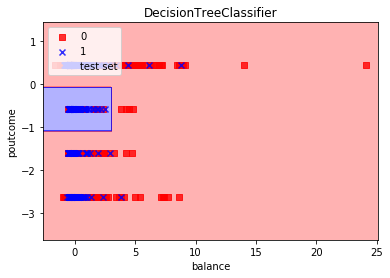

0.8784082535003684

In [520]:
ml_predict([5,15], method = DecisionTreeClassifier, plot = True)

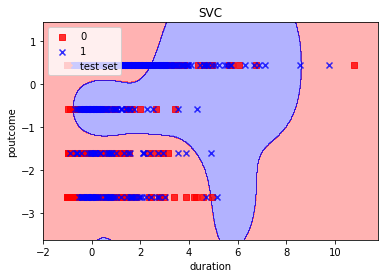

0.8820928518791452

In [521]:
ml_predict([11,15], method = SVC, plot = True)

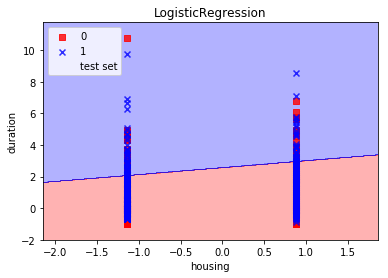

0.8791451731761238

In [522]:
ml_predict([6,11], method = LogisticRegression, plot = True)